# Analysis of Korean Dataset
In this notebook, we take a look at the Korean dataset.

In [1]:
import pandas as pd
df = pd.read_csv('../data/data_ko.csv', index_col=0)
df

,text,created_at,lang
id,,,
1529697716368211968,에버랜드XHYBE가든오브라이츠투바투개쩔어유어머뿔자영원럽GBGB순으로하는데포시즌스가든...,2022-05-26 05:35:30+00:00,ko
1529696380230696960,김가람탈퇴해hybe가김가람과괴롭힘을당한사람을화해시키는것을의논하고있다는데그게바로횡포실...,2022-05-26 05:30:12+00:00,ko
1529696274802683904,ʚ𝐘𝐨𝐮𝐫𝐓𝐰𝐞𝐧𝐭𝐲ɞ김선우생일응원프로젝트하이브앞버스정류장광고한강대교북단LG유플러스...,2022-05-26 05:29:46+00:00,ko
1529697908945133568,플리캠SimplyKPopBehindClip아니진짜로리터럴리천사잖아요இ௰இ♡KROUN...,2022-05-26 05:36:16+00:00,ko
1529697893870817280,라벤더베레모채원이김채원KIMCHAEWONチェウォン르세라핌LESSERAFIM,2022-05-26 05:36:12+00:00,ko
...,...,...,...
1532562810760495106,잘생김을넘어선아름다움TAEHYUNGYearsWithV태형아사랑해태형아지켜줄게정바비참...,2022-06-03 03:20:22+00:00,ko
1532561725983436800,두리뭉실넘어갈생각마라정바비참여곡삭제해garamOUT하이브피해자에게사과해,2022-06-03 03:16:03+00:00,ko
1532561322768203776,최애는내가선택하는것이아니라최애가내게강림하는거라면서요늘노력하고진실된모습보여줘서뿌듯한덕...,2022-06-03 03:14:27+00:00,ko


Next, we translate all the text to English in order to perform VADER sentiment analysis. This is done using Google Cloud API. 

In [10]:
# Grab the private API keys from a JSON file. 
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]='../korean-sentiment-analysis.json'

In [12]:
def translate_text(target, text):
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)
    
    return result["translatedText"]

In [17]:
# Translate all text rows using the Google Translate API.
df['en_text'] = df['text'].apply(lambda x: translate_text('en', x))

It took me about 4 minutes and 45.3 seconds to translate every row. 

In [19]:
df

,text,created_at,lang,en_text
id,,,,
1529697716368211968,에버랜드XHYBE가든오브라이츠투바투개쩔어유어머뿔자영원럽GBGB순으로하는데포시즌스가든...,2022-05-26 05:35:30+00:00,ko,Everland XHYBE Garden of Bright&#39;s Tobacco ...
1529696380230696960,김가람탈퇴해hybe가김가람과괴롭힘을당한사람을화해시키는것을의논하고있다는데그게바로횡포실...,2022-05-26 05:30:12+00:00,ko,hybe is discussing reconciling the harassed pe...
1529696274802683904,ʚ𝐘𝐨𝐮𝐫𝐓𝐰𝐞𝐧𝐭𝐲ɞ김선우생일응원프로젝트하이브앞버스정류장광고한강대교북단LG유플러스...,2022-05-26 05:29:46+00:00,ko,ʚ𝐘𝐨𝐮𝐫𝐓𝐰𝐞𝐧𝐭𝐲ɞ Kim Seon-woo&#39;s Birthday Cheer...
1529697908945133568,플리캠SimplyKPopBehindClip아니진짜로리터럴리천사잖아요இ௰இ♡KROUN...,2022-05-26 05:36:16+00:00,ko,"Flickam SimplyKPopBehindClip No, you&#39;re re..."
1529697893870817280,라벤더베레모채원이김채원KIMCHAEWONチェウォン르세라핌LESSERAFIM,2022-05-26 05:36:12+00:00,ko,"Lavender beret Chae-won Kim, Chae-won KIMCHAEWON"
...,...,...,...,...
1532562810760495106,잘생김을넘어선아름다움TAEHYUNGYearsWithV태형아사랑해태형아지켜줄게정바비참...,2022-06-03 03:20:22+00:00,ko,Beauty beyond good looks TAEHYUNGYearsWithV Ta...
1532561725983436800,두리뭉실넘어갈생각마라정바비참여곡삭제해garamOUT하이브피해자에게사과해,2022-06-03 03:16:03+00:00,ko,"Don&#39;t think about going overboard, I apolo..."
1532561322768203776,최애는내가선택하는것이아니라최애가내게강림하는거라면서요늘노력하고진실된모습보여줘서뿌듯한덕...,2022-06-03 03:14:27+00:00,ko,Saying that Choi Ae is not my choice but Choi ...


In [20]:
# Because I don't want to run the translation again and risk it taking too long, I'll just save the results to a CSV file.
df.to_csv('../data/data_ko.csv')

Now, we perform VADER sentiment analysis and compile our analysis into some pretty charts!

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['en_text']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['en_text']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['en_text']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['en_text']]

In [22]:
df

,text,created_at,lang,en_text,compound,neg,neu,pos
id,,,,,,,,
1529697716368211968,에버랜드XHYBE가든오브라이츠투바투개쩔어유어머뿔자영원럽GBGB순으로하는데포시즌스가든...,2022-05-26 05:35:30+00:00,ko,Everland XHYBE Garden of Bright&#39;s Tobacco ...,0.0000,0.000,1.000,0.000
1529696380230696960,김가람탈퇴해hybe가김가람과괴롭힘을당한사람을화해시키는것을의논하고있다는데그게바로횡포실...,2022-05-26 05:30:12+00:00,ko,hybe is discussing reconciling the harassed pe...,-0.8481,0.380,0.620,0.000
1529696274802683904,ʚ𝐘𝐨𝐮𝐫𝐓𝐰𝐞𝐧𝐭𝐲ɞ김선우생일응원프로젝트하이브앞버스정류장광고한강대교북단LG유플러스...,2022-05-26 05:29:46+00:00,ko,ʚ𝐘𝐨𝐮𝐫𝐓𝐰𝐞𝐧𝐭𝐲ɞ Kim Seon-woo&#39;s Birthday Cheer...,0.5106,0.000,0.891,0.109
1529697908945133568,플리캠SimplyKPopBehindClip아니진짜로리터럴리천사잖아요இ௰இ♡KROUN...,2022-05-26 05:36:16+00:00,ko,"Flickam SimplyKPopBehindClip No, you&#39;re re...",0.0000,0.000,1.000,0.000
1529697893870817280,라벤더베레모채원이김채원KIMCHAEWONチェウォン르세라핌LESSERAFIM,2022-05-26 05:36:12+00:00,ko,"Lavender beret Chae-won Kim, Chae-won KIMCHAEWON",0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
1532562810760495106,잘생김을넘어선아름다움TAEHYUNGYearsWithV태형아사랑해태형아지켜줄게정바비참...,2022-06-03 03:20:22+00:00,ko,Beauty beyond good looks TAEHYUNGYearsWithV Ta...,0.9313,0.057,0.512,0.431
1532561725983436800,두리뭉실넘어갈생각마라정바비참여곡삭제해garamOUT하이브피해자에게사과해,2022-06-03 03:16:03+00:00,ko,"Don&#39;t think about going overboard, I apolo...",-0.1779,0.093,0.844,0.062
1532561322768203776,최애는내가선택하는것이아니라최애가내게강림하는거라면서요늘노력하고진실된모습보여줘서뿌듯한덕...,2022-06-03 03:14:27+00:00,ko,Saying that Choi Ae is not my choice but Choi ...,0.8885,0.039,0.688,0.273


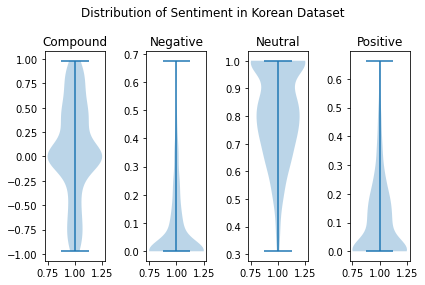

In [23]:
import matplotlib.pyplot as plt

# Extract Figure and Axes instance
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)

# Create plots showing distribution
ax1.violinplot(df.compound)
ax1.set_title('Compound')

ax2.violinplot(df.neg)
ax2.set_title('Negative')

ax3.violinplot(df.neu)
ax3.set_title('Neutral')

ax4.violinplot(df.pos)
ax4.set_title('Positive')

# Display settings
fig.suptitle('Distribution of Sentiment in Korean Dataset')
fig.tight_layout()
plt.show()

In [26]:
# Visualize the most commonet keywords in the dataset
keywords = df['en_text'].str.split().apply(pd.Series.value_counts).sum(axis=0)

# Turn the series into a dataframe.
keywords = keywords.to_frame()
keywords.columns = ['count']

# Set the first column to the index.
keywords = keywords.reset_index()

# Rename the index column to 'keyword'
keywords = keywords.rename(columns={'index': 'keyword'})

# Remove all instances with count > 3, which are insignificant.
keywords = keywords[keywords['count'] > 3]

# Remove non-English keywords.
keywords = keywords[keywords['keyword'].str.contains('[a-zA-Z]')]

# # Remove irrelevant, common English keywords.
# keywords = keywords[~keywords['keyword'].isin(['the', 'and', 'to', 
#                                                 'is', 'a', 'of', 
#                                                 'for', 'that', 'I', 
#                                                 'in', 'on', 'this', 
#                                                 'with', 'are', 'they', 
#                                                 'you', 'it', 'be'])]

# Sort by descending count.
keywords = keywords.sort_values('count', ascending=False)

keywords

,keyword,count
9,the,383.0
40,Kim,281.0
105,Seraphim,236.0
136,to,203.0
191,Le,188.0
...,...,...
296,use,4.0
424,S,4.0
1303,MD,4.0
1298,under,4.0


<AxesSubplot:title={'center':'Keywords in Korean dataset'}, xlabel='keyword'>

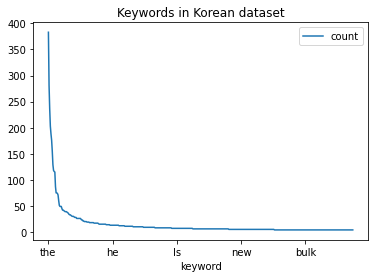

In [27]:
# Create a scatterplot of the keywords.
keywords.plot.line(x='keyword', y='count', title='Keywords in Korean dataset') #, figsize=(10, 10))